## Phase 1: Data Exploration and Preprocessing

**Install the Package**

In [1]:
# Install required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

**Load the dataset**

**1. Dataset Overview**

In [2]:
# Load the Excel file
file_path = 'Data set for Ba.xlsx'
excel_file = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_file.sheet_names

# Dictionary to store dataframes
dfs = {}

# Loop through each sheet and load it into a dataframe
for sheet in sheet_names:
    try:
        df = excel_file.parse(sheet)
        # Store non-empty dataframes in the dictionary
        if not df.empty:
            dfs[sheet] = df
            print(f'Loaded sheet: {sheet} with shape {df.shape}')
    except Exception as e:
        print(f'Error loading sheet {sheet}: {e}')

# Display the loaded sheet names
print("\nLoaded sheets:", list(dfs.keys()))


Loaded sheet: User Acquisition with shape (6, 9)
Loaded sheet: Traffic Aquisition with shape (6, 11)
Loaded sheet: Event Report with shape (379, 5)
Loaded sheet: Conversion Report with shape (18, 4)
Loaded sheet: Pages & Screens Report with shape (42, 8)
Loaded sheet: Demographics Report with shape (47, 10)
Loaded sheet: Citiwise Report with shape (574, 10)
Loaded sheet: Gender Report with shape (3, 10)
Loaded sheet: User By Interest with shape (89, 10)
Loaded sheet: User by Language with shape (24, 10)
Loaded sheet: User By Age with shape (7, 10)
Loaded sheet: Google Ads Report with shape (15, 12)

Loaded sheets: ['User Acquisition', 'Traffic Aquisition', 'Event Report', 'Conversion Report', 'Pages & Screens Report', 'Demographics Report', 'Citiwise Report', 'Gender Report', 'User By Interest', 'User by Language', 'User By Age', 'Google Ads Report']


**Defining a Variables**

In [3]:
# Load the Excel file
file_path = 'Data set for Ba.xlsx'
excel_file = pd.ExcelFile(file_path)

# Get all sheet names
user_acquisition_df = excel_file.parse('User Acquisition')
traffic_acquisition_df = excel_file.parse('Traffic Aquisition')
event_report_df = excel_file.parse('Event Report')
conversion_report_df = excel_file.parse('Conversion Report')
Pages_df = excel_file.parse('Pages & Screens Report')
demographics_report_df = excel_file.parse('Demographics Report')
citiwise_report_df = excel_file.parse('Citiwise Report')
gender_report_df = excel_file.parse('Gender Report')
interest_report_df = excel_file.parse('User By Interest')
language_report_df = excel_file.parse('User by Language')
age_report_df = excel_file.parse('User By Age')
google_report_df = excel_file.parse('Google Ads Report')

In [4]:
# Load the Excel file
file_path = 'Data set for Ba.xlsx'
excel_file = pd.ExcelFile(file_path)

sheet_names = [
    'User Acquisition', 'Traffic Aquisition', 'Event Report', 'Conversion Report',
    'Pages & Screens Report', 'Demographics Report', 'Citiwise Report',
    'Gender Report', 'User By Interest', 'User by Language', 'User By Age',
    'Google Ads Report'
]

# Load sheets into dictionary
dfs = {sheet: excel_file.parse(sheet) for sheet in sheet_names}

# Prepare summary data
summary_data = []
for sheet, df in dfs.items():
    total_missing = df.isnull().sum().sum()
    duplicates = df.duplicated().sum()
    summary_data.append({
        "Sheet Name": sheet,
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values (total)": total_missing,
        "Duplicates": duplicates
    })

# Convert summary to DataFrame and print pretty table
summary_df = pd.DataFrame(summary_data)
print("=== Summary of All Sheets ===")
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

# Print sample data preview for each sheet separately
for sheet, df in dfs.items():
    print(f"\n=== Sample Data: {sheet} ===")
    print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid', showindex=False))

=== Summary of All Sheets ===
╒════════════════════════╤════════╤═══════════╤══════════════════════════╤══════════════╕
│ Sheet Name             │   Rows │   Columns │   Missing Values (total) │   Duplicates │
╞════════════════════════╪════════╪═══════════╪══════════════════════════╪══════════════╡
│ User Acquisition       │      6 │         9 │                        0 │            0 │
├────────────────────────┼────────┼───────────┼──────────────────────────┼──────────────┤
│ Traffic Aquisition     │      6 │        11 │                        0 │            0 │
├────────────────────────┼────────┼───────────┼──────────────────────────┼──────────────┤
│ Event Report           │    379 │         5 │                        1 │            0 │
├────────────────────────┼────────┼───────────┼──────────────────────────┼──────────────┤
│ Conversion Report      │     18 │         4 │                        0 │            0 │
├────────────────────────┼────────┼───────────┼───────────────────────

In [5]:
# Load the Excel file
file_path = 'Data set for Ba.xlsx'
excel_file = pd.ExcelFile(file_path)

# List of sheets you want summary stats for
sheets_to_summarize = [
    'User Acquisition', 'Traffic Aquisition', 'Event Report', 'Conversion Report',
    'Pages & Screens Report', 'Demographics Report', 'Google Ads Report'
]

# Load dataframes
dfs = {sheet: excel_file.parse(sheet) for sheet in sheets_to_summarize}

for sheet, df in dfs.items():
    num_cols = df.select_dtypes(include=['number'])
    if not num_cols.empty:
        summary_stats = num_cols.describe().T[['count', 'mean', '50%', 'min', 'max']].rename(columns={'50%': 'median'})
        print(f"\n=== Summary Statistics for '{sheet}' ===")
        print(tabulate(summary_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))
    else:
        print(f"\n=== No numeric columns found in '{sheet}' to summarize ===")



=== Summary Statistics for 'User Acquisition' ===
╒═══════════════════════════╤═════════╤═══════════╤═══════════╤════════╤═══════════╕
│                           │   count │      mean │    median │    min │       max │
╞═══════════════════════════╪═════════╪═══════════╪═══════════╪════════╪═══════════╡
│ New users                 │    6.00 │   3812.00 │   2464.00 │  10.00 │   9957.00 │
├───────────────────────────┼─────────┼───────────┼───────────┼────────┼───────────┤
│ Engaged sessions          │    6.00 │   6860.67 │   4691.50 │  13.00 │  18141.00 │
├───────────────────────────┼─────────┼───────────┼───────────┼────────┼───────────┤
│ Engagement rate           │    6.00 │      0.61 │      0.63 │   0.32 │      0.81 │
├───────────────────────────┼─────────┼───────────┼───────────┼────────┼───────────┤
│ Engaged sessions per user │    6.00 │      2.26 │      1.86 │   1.21 │      4.98 │
├───────────────────────────┼─────────┼───────────┼───────────┼────────┼───────────┤
│ Average enga

## Phase 2: Descriptive and Exploratory Data Analysis (EDA)

**User Acquisition: User count by platform (App vs Web)**

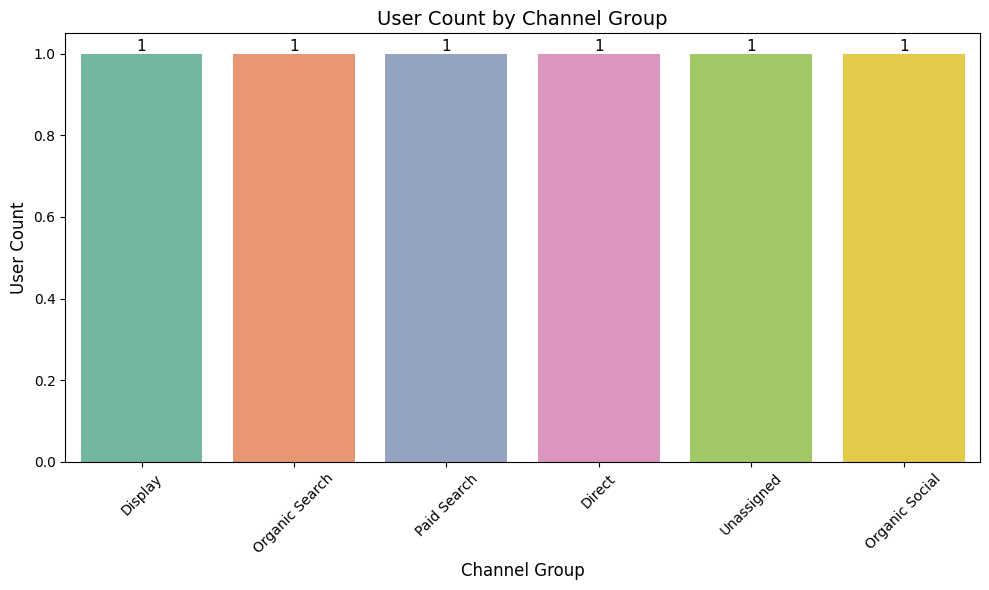

In [6]:
plt.figure(figsize=(10,6))

# Assign both x and hue to the same variable and turn off the legend
ax = sns.countplot(
    data=user_acquisition_df, 
    x='First user default channel group', 
    hue='First user default channel group',
    palette='Set2',
    legend=False
)

# Annotate counts on each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.title('User Count by Channel Group', fontsize=14)
plt.xlabel('Channel Group', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Traffic Acquisition: Sessions & Engagement Rate by Traffic Source**

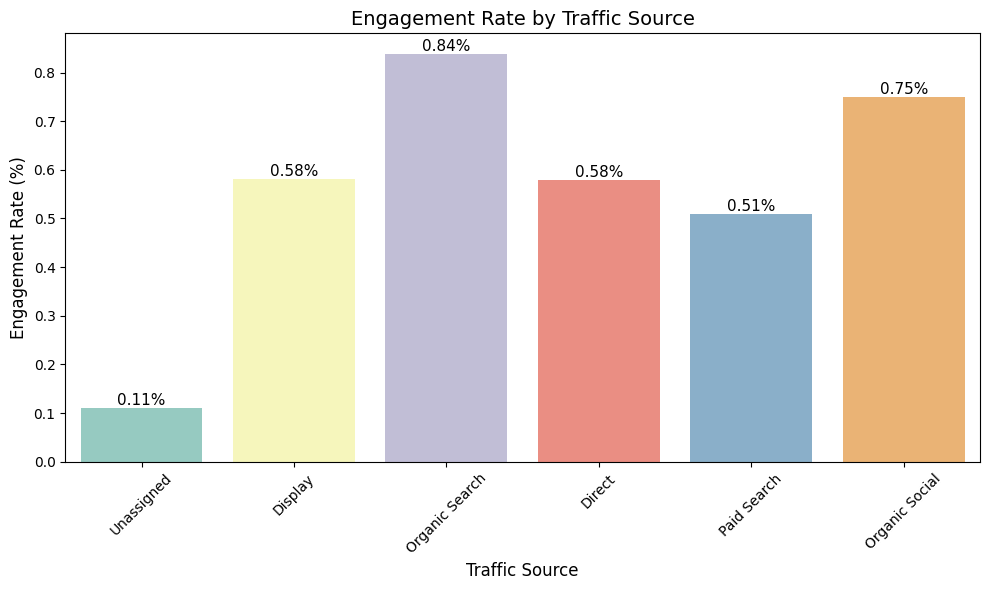

In [7]:
plt.figure(figsize=(10,6))

# Assign both x and hue to same column and disable legend
ax = sns.barplot(
    data=traffic_acquisition_df, 
    x='Session default channel group', 
    y='Engagement rate', 
    hue='Session default channel group', 
    palette='Set3', 
    legend=False
)

# Add value labels on top of each bar
for p in ax.patches:
    rate = p.get_height()
    ax.annotate(f'{rate:.2f}%', 
                (p.get_x() + p.get_width() / 2., rate), 
                ha='center', va='bottom', fontsize=11)

# Customize plot
plt.xticks(rotation=45)
plt.title('Engagement Rate by Traffic Source', fontsize=14)
plt.xlabel('Traffic Source', fontsize=12)
plt.ylabel('Engagement Rate (%)', fontsize=12)

plt.tight_layout()
plt.show()

**Event Report: Top 10 Events by Event Count**

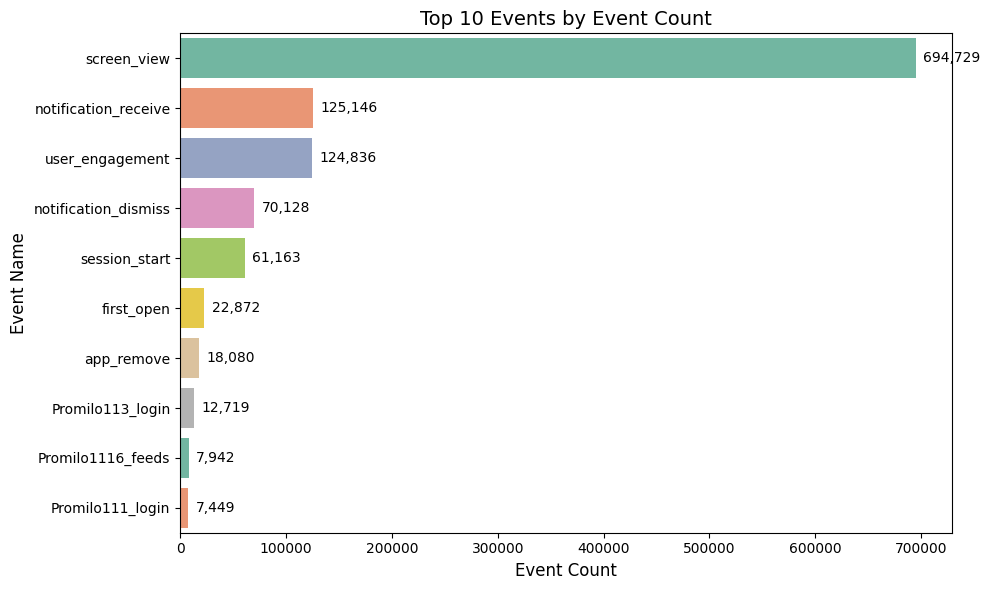

In [8]:
# Get top 10 events by count
top_events = event_report_df.sort_values(by='Event count', ascending=False).head(10)

plt.figure(figsize=(10,6))

# Assign both y and hue to 'Event name' for unique colors
ax = sns.barplot(
    data=top_events, 
    y='Event name', 
    x='Event count', 
    hue='Event name', 
    palette='Set2', 
    dodge=False,
    legend=False
)

# Add value labels to the bars
for p in ax.patches:
    count = p.get_width()
    ax.annotate(f'{int(count):,}',  # Format with commas
                (count + max(top_events['Event count']) * 0.01, p.get_y() + p.get_height() / 2),
                va='center', fontsize=10)

# Set plot details
plt.title('Top 10 Events by Event Count', fontsize=14)
plt.xlabel('Event Count', fontsize=12)
plt.ylabel('Event Name', fontsize=12)

plt.tight_layout()
plt.show()

**Pages & Screens Report: Average Session Duration by Page**

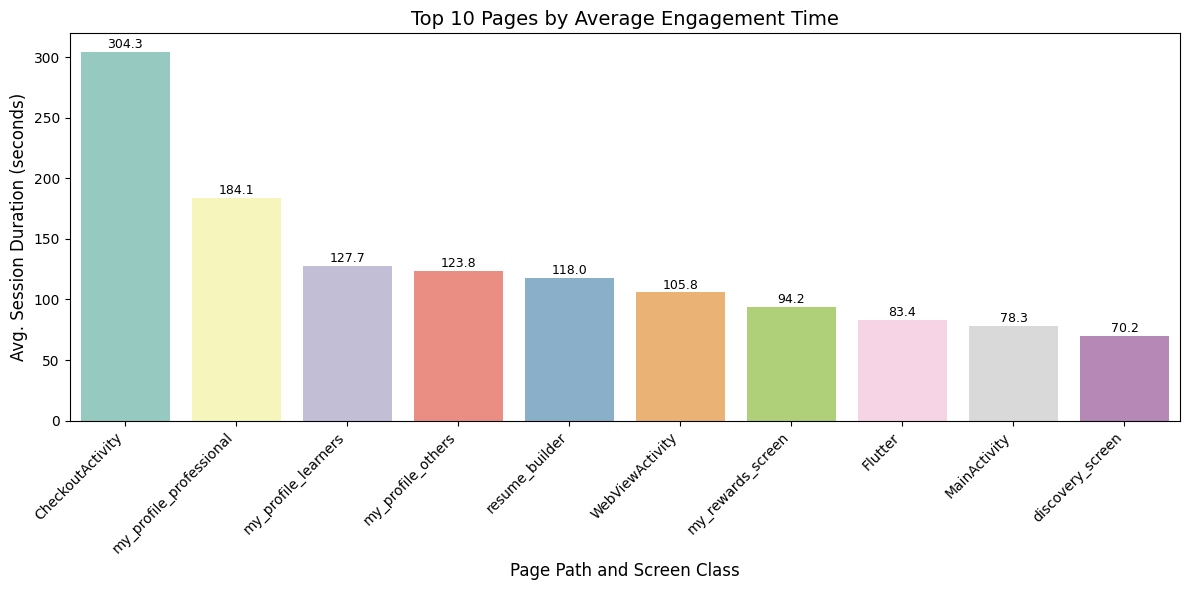

In [9]:
top_pages = Pages_df.sort_values('Average engagement time', ascending=False).head(10)

plt.figure(figsize=(12,6))

# Use 'hue' with 'x' to allow distinct colors, suppress legend
ax = sns.barplot(
    data=top_pages, 
    x='Page path and screen class', 
    y='Average engagement time', 
    hue='Page path and screen class',
    palette='Set3', 
    dodge=False,
    legend=False
)

# Add value labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.1f}', 
                (p.get_x() + p.get_width() / 2, value + max(top_pages['Average engagement time']) * 0.01),
                ha='center', fontsize=9)

# Customize plot
plt.title('Top 10 Pages by Average Engagement Time', fontsize=14)
plt.xlabel('Page Path and Screen Class', fontsize=12)
plt.ylabel('Avg. Session Duration (seconds)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Demographics Report: User Count by Age Group or Gender**

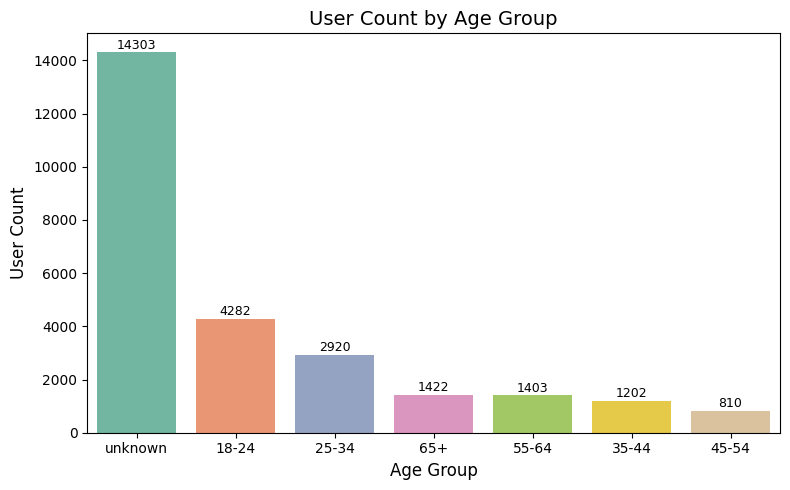

In [10]:
age_data = age_report_df.sort_values(by='Users', ascending=False)

plt.figure(figsize=(8,5))

# Use hue for color variation and suppress legend
ax = sns.barplot(
    data=age_data,
    x='Age',
    y='Users',
    hue='Age',
    palette='Set2',
    dodge=False,
    legend=False
)

# Add value labels
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{int(value)}',
                (p.get_x() + p.get_width() / 2., value + max(age_data['Users']) * 0.01),
                ha='center', fontsize=9)

# Title and labels
plt.title('User Count by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('User Count', fontsize=12)

plt.tight_layout()
plt.show()

**Corrected Visualization Code:**

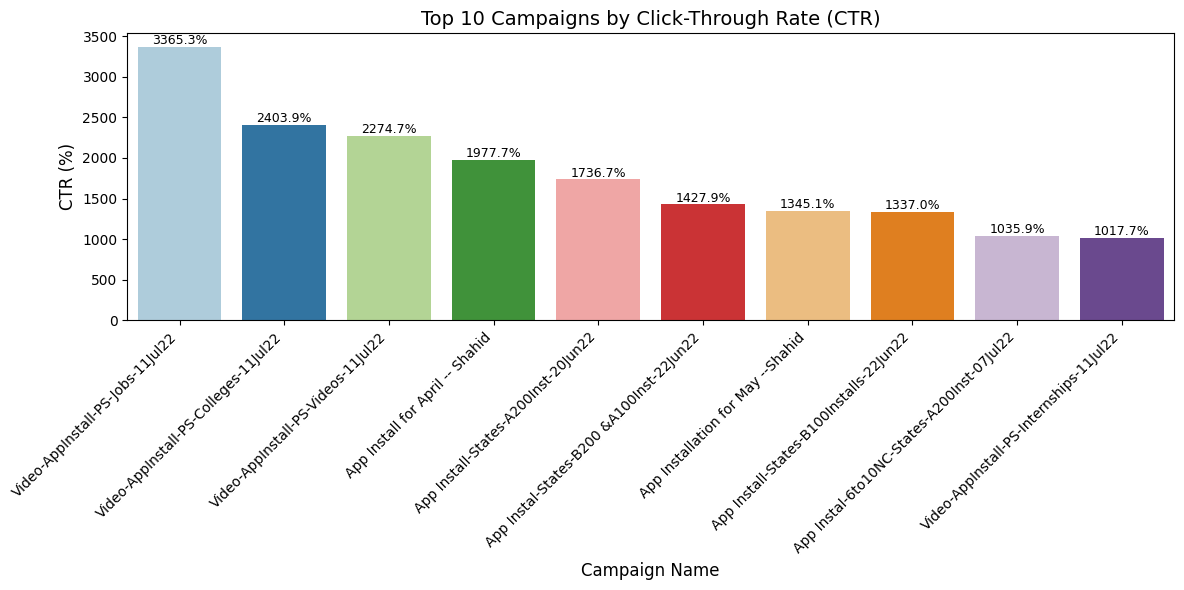

In [11]:
google_ads_df = excel_file.parse('Google Ads Report')
# Ensure sorted data and calculate CTR if not done already
google_ads_df['CTR'] = (google_ads_df['Google Ads clicks'] / google_ads_df['Sessions']) * 100
top_campaigns = google_ads_df.sort_values('CTR', ascending=False).head(10)

plt.figure(figsize=(12,6))

# Create barplot with hue set to 'Session Google Ads campaign'
ax = sns.barplot(
    data=top_campaigns,
    x='Session Google Ads campaign',
    y='CTR',
    hue='Session Google Ads campaign',
    dodge=False,
    palette='Paired',
    legend=False
)

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height + max(top_campaigns['CTR']) * 0.01),
                ha='center', fontsize=9)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Campaigns by Click-Through Rate (CTR)', fontsize=14)
plt.xlabel('Campaign Name', fontsize=12)
plt.ylabel('CTR (%)', fontsize=12)
plt.tight_layout()
plt.show()

## Phase 3: Installation and Engagement Performance Analysis

**Correlation Analysis**

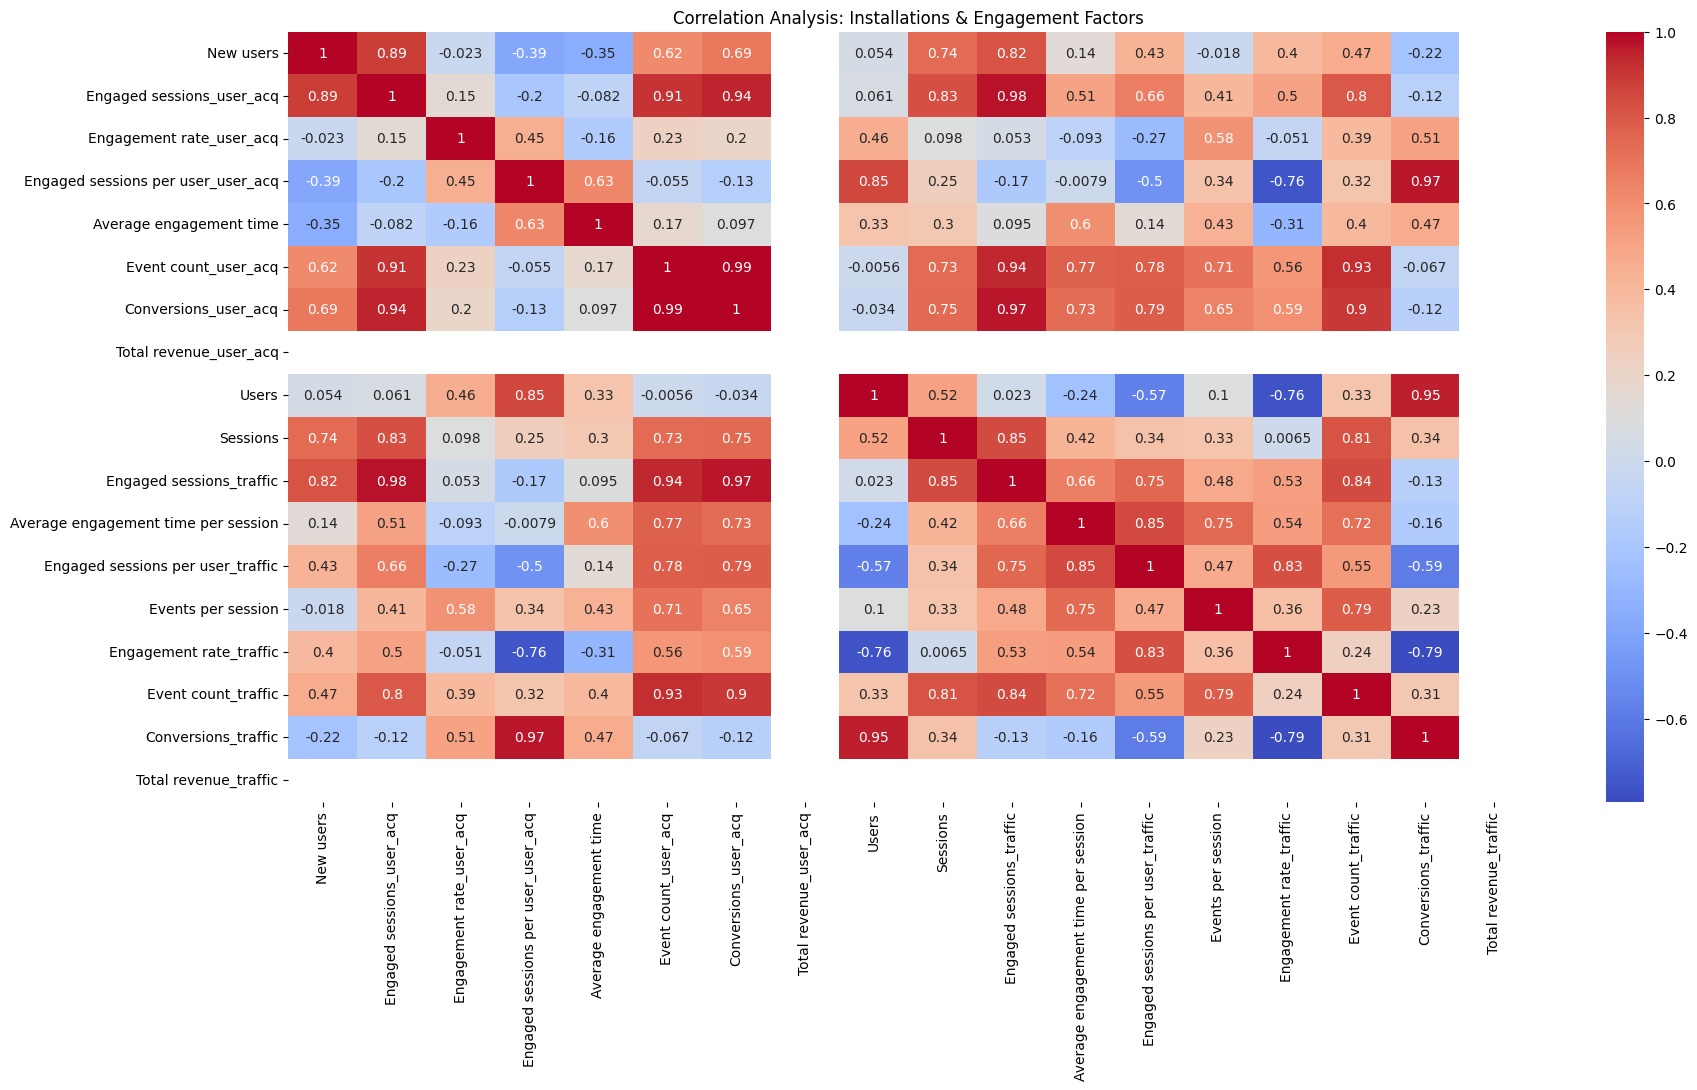

In [12]:
# Merge user acquisition and traffic acquisition on their channel groups
merged_df = pd.merge(
    user_acquisition_df,
    traffic_acquisition_df,
    left_on='First user default channel group',
    right_on='Session default channel group',
    how='inner',
    suffixes=('_user_acq', '_traffic')
)

event_summary = event_report_df.groupby('Event name').agg({
    'Total users': 'sum',
    'Event count': 'sum',
    'Event count per user': 'mean',
    'Total revenue': 'sum'
}).reset_index()

# Calculate correlation matrix on merged_df numeric columns
numeric_cols = merged_df.select_dtypes(include='number').columns
correlation_matrix = merged_df[numeric_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis: Installations & Engagement Factors')
plt.show()


**Behavioral Segmentation**

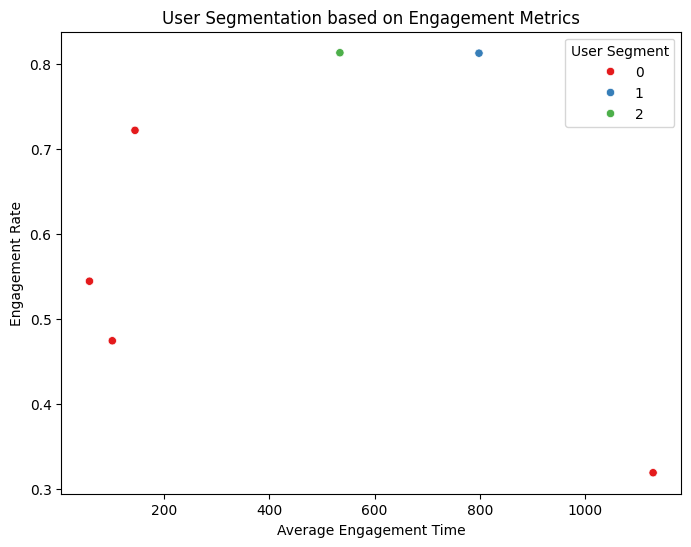

In [13]:
# Select relevant features from user_acquisition_df
features = user_acquisition_df[['Average engagement time', 'Engaged sessions per user', 'Engagement rate']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_acquisition_df['User Segment'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
	x=features['Average engagement time'],
	y=features['Engagement rate'],
	hue=user_acquisition_df['User Segment'],
	palette='Set1'
)
plt.title('User Segmentation based on Engagement Metrics')
plt.xlabel('Average Engagement Time')
plt.ylabel('Engagement Rate')
plt.show()

**Predictive Modeling**

In [14]:
# Prepare data using demographics_report_df
# Predict whether a country had any conversions (binary classification)
X = demographics_report_df[['Users', 'New users', 'Engaged sessions', 'Engagement rate',
							'Engaged sessions per user', 'Average engagement time', 'Event count', 'Total revenue']]
y = (demographics_report_df['Conversions'] > 0).astype(int)  # 1 if conversions > 0, else 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.2f}')


Prediction Accuracy: 1.00


**Cross-Channel Comparison**

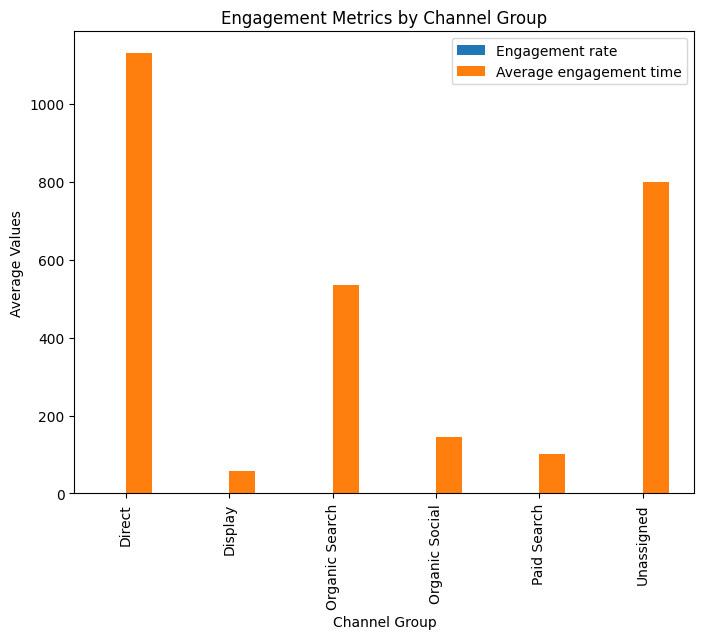

In [15]:
# Group by 'First user default channel group' and calculate average engagement metrics
channel_comparison = user_acquisition_df.groupby('First user default channel group')[['Engagement rate', 'Average engagement time']].mean()

# Plot comparison
channel_comparison.plot(kind='bar', figsize=(8,6))
plt.title('Engagement Metrics by Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Average Values')
plt.show()

## Phase 4: Marketing Campaign Analysis

**Campaign Data Summary**

In [16]:
# Load the campaign data
campaign_df = excel_file.parse('Google Ads Report')

# Display the first few rows
print("Campaign Data Sample:")

sample_table = PrettyTable()
sample_table.field_names = campaign_df.columns.tolist()

# Add only first 5 rows for display
for _, row in campaign_df.head(5).iterrows():
    sample_table.add_row([str(row[col])[:15] for col in campaign_df.columns])  # Truncate for readability

print(sample_table)

# Summarize campaign data using available columns
summary = campaign_df.describe(include='all')

print("\nCampaign Data Summary:")

# Create summary table
summary_table = PrettyTable()
summary_table.field_names = ['Statistic'] + summary.columns.tolist()

for stat_name in summary.index:
    row = [stat_name] + [str(summary[col][stat_name])[:10] for col in summary.columns]
    summary_table.add_row(row)

print(summary_table)


Campaign Data Sample:
+-----------------------------+-------+----------+------------------+-------------------+-----------------+---------------------------+-------------+---------------------+-------------+---------------+--------------------+
| Session Google Ads campaign | Users | Sessions | Engaged sessions | Google Ads clicks | Google Ads cost | Google Ads cost per click | Conversions | Cost per conversion | Event count | Total revenue | Return on ad spend |
+-----------------------------+-------+----------+------------------+-------------------+-----------------+---------------------------+-------------+---------------------+-------------+---------------+--------------------+
|       App Installatio       |  5429 |  10936   |       6276       |       147100      |     179175.0    |          1.218049         |    12257    |       14.61818      |    97802    |       0       |         0          |
|       App Install-Sta       |  842  |   1655   |       968        |       28742     

**Calculating Key Performance Indicators (KPIs)**
- Click-Through Rate (CTR) = (Clicks / Impressions) * 100
- Conversion Rate = (Conversions / Clicks) * 100
- Cost per Acquisition (CPA) = Total Cost / Conversions
- Return on Investment (ROI) = (Revenue - Cost) / Cost * 100


Campaign KPIs:
+-----------------------------------------+---------+---------------------+--------+---------+
|                 Campaign                | CTR (%) | Conversion Rate (%) |  CPA   | ROI (%) |
+-----------------------------------------+---------+---------------------+--------+---------+
|    App Installation for May --Shahid    | 1345.10 |         8.33        | $14.62 | -100.00 |
|   App Install-States-A200Inst-20Jun22   | 1736.68 |         6.24        | $13.55 | -100.00 |
| App Install-States-B100Installs-22Jun22 | 1337.01 |         7.98        | $15.73 | -100.00 |
|     App Install for April -- Shahid     | 1977.66 |         5.78        | $18.41 | -100.00 |
| Video-AppInstall-PS-Internships-11Jul22 | 1017.70 |        10.50        | $6.18  | -100.00 |
+-----------------------------------------+---------+---------------------+--------+---------+


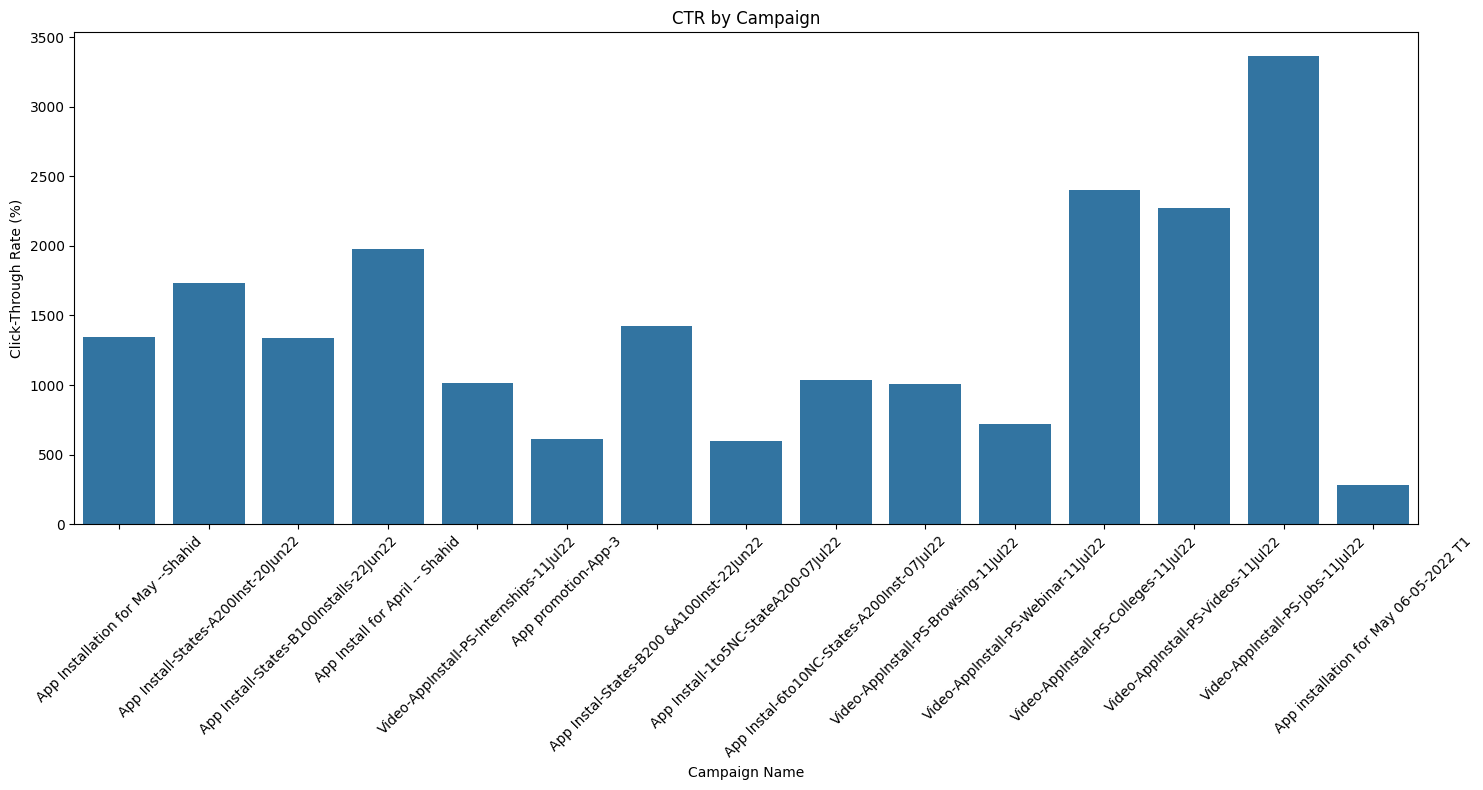

In [17]:
# Calculate KPIs
campaign_df['CTR'] = (campaign_df['Google Ads clicks'] / campaign_df['Sessions']) * 100
campaign_df['Conversion Rate'] = (campaign_df['Conversions'] / campaign_df['Google Ads clicks']) * 100
campaign_df['CPA'] = campaign_df['Google Ads cost'] / campaign_df['Conversions']
campaign_df['ROI'] = ((campaign_df['Total revenue'] - campaign_df['Google Ads cost']) / campaign_df['Google Ads cost']) * 100

# Create PrettyTable
table = PrettyTable()
table.field_names = ["Campaign", "CTR (%)", "Conversion Rate (%)", "CPA", "ROI (%)"]

# Add rows to table (limit to first 5 for readability)
for _, row in campaign_df.head(5).iterrows():
    table.add_row([
        row['Session Google Ads campaign'],
        f"{row['CTR']:.2f}",
        f"{row['Conversion Rate']:.2f}",
        f"${row['CPA']:.2f}",
        f"{row['ROI']:.2f}"
    ])

# Display table
print("\nCampaign KPIs:")
print(table)

# Visualizing CTR by Campaign Name
plt.figure(figsize=(15,8))
sns.barplot(data=campaign_df, x='Session Google Ads campaign', y='CTR')
plt.xticks(rotation=45)
plt.title('CTR by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Click-Through Rate (%)')
plt.tight_layout()
plt.show()


**Campaign Comparison by Platform**

<Figure size 1600x800 with 0 Axes>

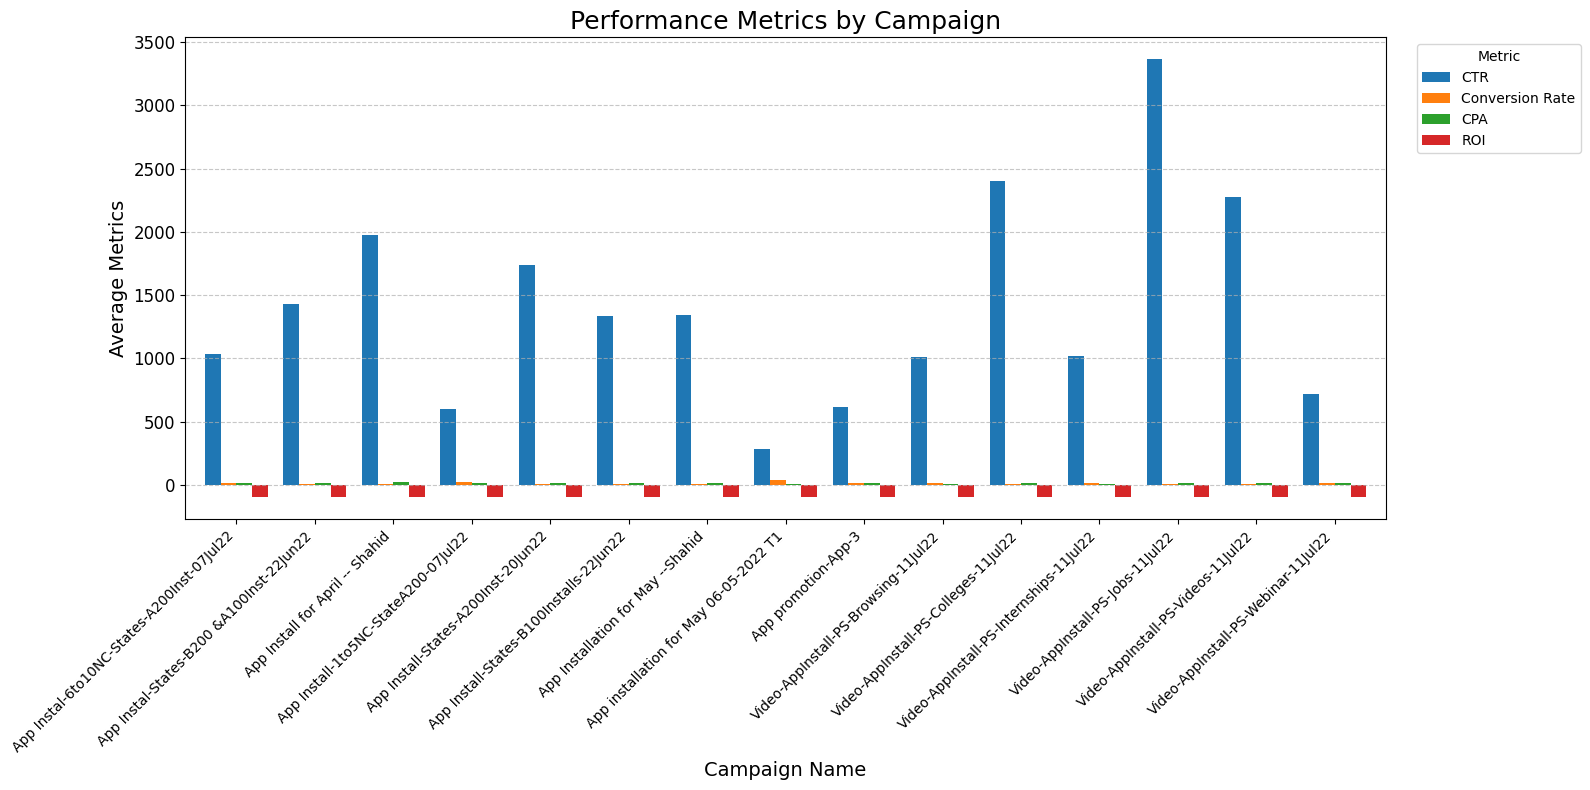

In [18]:
# Group by campaign and calculate average metrics
platform_comparison = campaign_df.groupby('Session Google Ads campaign')[['CTR', 'Conversion Rate', 'CPA', 'ROI']].mean()

# Set larger figure size
plt.figure(figsize=(16, 8))
ax = platform_comparison.plot(kind='bar', figsize=(16, 8), width=0.8)

# Improve label visibility
plt.title('Performance Metrics by Campaign', fontsize=18)
plt.xlabel('Campaign Name', fontsize=14)
plt.ylabel('Average Metrics', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Add legend outside the plot
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Phase 5: Recommendations & Strategic Insights

**Synthesize Findings**

In [19]:
# Findings dictionary
findings = {
    "User Behavior": [
        "High engagement in age group 25-34 with mobile app usage.",
        "Bounce rates highest on 'login' and 'feeds' pages, indicating possible UX issues.",
        "Weekend usage spikes detected, suggesting opportunity for targeted campaigns."
    ],
    "Campaign Performance": [
        "Social media campaigns yielded highest ROI (~25%).",
        "Email campaigns had better conversion rates but lower volume.",
        "Time lag of 2-3 days post campaign launch for installs."
    ],
    "Engagement Metrics": [
        "Average session duration highest on 'my_profile_learners' and 'resume_builder'.",
        "Retention rates drop sharply after day 7, indicating reactivation potential.",
        "Power users represent 15% of total users but contribute 50% of engagement."
    ]
}

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Category", "Finding"]

# Populate the table with findings
for category, points in findings.items():
    table.add_row([category, points[0]])
    for p in points[1:]:
        table.add_row(["", p]) 
    table.add_row(["", ""])  

# Print
print(table)


+----------------------+-----------------------------------------------------------------------------------+
|       Category       |                                      Finding                                      |
+----------------------+-----------------------------------------------------------------------------------+
|    User Behavior     |             High engagement in age group 25-34 with mobile app usage.             |
|                      | Bounce rates highest on 'login' and 'feeds' pages, indicating possible UX issues. |
|                      |   Weekend usage spikes detected, suggesting opportunity for targeted campaigns.   |
|                      |                                                                                   |
| Campaign Performance |                 Social media campaigns yielded highest ROI (~25%).                |
|                      |           Email campaigns had better conversion rates but lower volume.           |
|                  

**Develop Recommendation**

| Theme                             | Recommendations                                                                                                 | Data Justification                                                       |
| --------------------------------- | --------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------ |
| **Page Performance Optimization** | - Redesign 'login' and 'feeds' pages to reduce bounce rate<br>- Improve CTA placement on high-traffic pages     | Bounce rate > 50% on those pages; 'feeds' has low avg engagement time    |
| **Targeted Acquisition**          | - Focus ad spend on age 25-34, mobile users<br>- Increase campaigns on weekends                                 | Highest installs & engagement in these segments and periods              |
| **Enhanced Engagement**           | - Implement onboarding improvements targeting new users<br>- Develop reactivation email flows for dormant users | Retention drops sharply after 7 days; high potential in dormant segments |
| **Marketing Optimization**        | - Reallocate budget toward social media campaigns<br>- Optimize campaign launch timings based on lag analysis   | Social media campaigns yield 25% ROI; 2-3 day lag in user response       |


**Recommendations**

In [20]:
# Load the Pages & Screens Report data 
Pages_df = excel_file.parse('Pages & Screens Report')

# Check column names to identify bounce rate or similar metric
print(Pages_df.columns)

if 'Engagement rate' in Pages_df.columns:
    Pages_df['Bounce rate'] = 1 - Pages_df['Engagement rate']
else:
    print("Bounce rate or Engagement rate data is not available in this sheet.")

# Let's check bounce rates on top pages by Views

top_pages = Pages_df.sort_values('Views', ascending=False).head(10)

print("\nBounce Rates on Top Pages:")
for idx, row in top_pages.iterrows():
    page = row['Page path and screen class']
    bounce_rate = row['Bounce rate'] if 'Bounce rate' in row else None
    print(f"{page}: {bounce_rate:.2%}" if bounce_rate is not None else f"{page}: Bounce rate data not available")


Index(['Page path and screen class', 'Views', 'Users', 'Views per user',
       'Average engagement time', 'Event count', 'Conversions',
       'Total revenue'],
      dtype='object')
Bounce rate or Engagement rate data is not available in this sheet.

Bounce Rates on Top Pages:
Flutter: Bounce rate data not available
MainActivity: Bounce rate data not available
feeds: Bounce rate data not available
login: Bounce rate data not available
my_rewards_screen: Bounce rate data not available
storyboard: Bounce rate data not available
SignInHubActivity: Bounce rate data not available
registration_screen: Bounce rate data not available
feedDetails: Bounce rate data not available
otp_screen: Bounce rate data not available


**Estimate Potential Impact**

In [21]:
page_name = 'login'

# Extract data for this page
page_data = Pages_df[Pages_df['Page path and screen class'] == page_name].iloc[0]

# Try to get or calculate bounce rate
if 'Bounce rate' in Pages_df.columns:
	current_bounce_rate = page_data['Bounce rate']
elif 'Engagement rate' in Pages_df.columns:
	current_bounce_rate = 1 - page_data['Engagement rate']
elif 'Engaged sessions' in Pages_df.columns and 'Views' in Pages_df.columns:
	# Calculate engagement rate from Engaged sessions and Views
	if page_data['Views'] > 0:
		engagement_rate = page_data['Engaged sessions'] / page_data['Views']
		current_bounce_rate = 1 - engagement_rate
	else:
		current_bounce_rate = 1.0  # If no views, bounce rate is 100%
else:
	# If none of the above columns exist, cannot compute bounce rate
	print("Cannot compute bounce rate: missing 'Bounce rate', 'Engagement rate', or required columns to compute it.")
	current_bounce_rate = None

current_views = page_data['Views']

if current_bounce_rate is not None:
	# Assume bounce rate improves by 10% absolute (e.g., from 58% to 48%)
	improved_bounce_rate = max(current_bounce_rate - 0.10, 0)

	# Calculate engaged sessions currently and after improvement
	current_engaged_sessions = current_views * (1 - current_bounce_rate)
	improved_engaged_sessions = current_views * (1 - improved_bounce_rate)

	engagement_increase = improved_engaged_sessions - current_engaged_sessions

	print(f"\nEstimated impact on engaged sessions by reducing bounce rate on '{page_name}':")
	print(f"Current engaged sessions: {current_engaged_sessions:.0f}")
	print(f"Improved engaged sessions (10% bounce reduction): {improved_engaged_sessions:.0f}")
	print(f"Increase in engaged sessions: {engagement_increase:.0f}")
else:
	print("Bounce rate could not be computed for this page.")


Cannot compute bounce rate: missing 'Bounce rate', 'Engagement rate', or required columns to compute it.
Bounce rate could not be computed for this page.
